In [22]:
import LoadRuns as lr
import glob
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Some things would like to look at. 
1. Average weekly and monthly distance over time.
2. Average pace per km over time
3. Average heart rate over time

Requirements for this are to be able to calculate:
- Total distance per activity
- Start time of activity
- Average pace per km
- Average heart rate

In [2]:
# activity = lr.Activity('sample/2017-09-19_Dublin 1 Running_Running.tcx')
activity = lr.Activity('sample/2017-10-14_Dublin 1 Running_Running.tcx')

df = activity.get_all_track_points()
print(activity.start_time())
print(activity.activity_type())
print(activity.average_heart_rate())
print(activity.total_distance_meters())
print(activity.average_pace())

2017-10-14 10:21:24
Running
145.431276032
30074.71
0 days 00:06:09.635734


In [19]:
data_dir = '/home/nmoran/Dropbox/Apps/tapiriik'
files = glob.glob('%s/*.tcx' % data_dir)
activities = [lr.Activity(x) for x in files]
activities = [x for x in activities if x.activity_type() == 'Running']
activities = [x for x in activities if x.start_time() > pd.to_datetime('2017-05-01')]

df = pd.DataFrame({'date' : [x.start_time() for x in activities],
                   'heart_rate': [x.average_heart_rate() for x in activities],
                   'distance': [x.total_distance_meters() for x in activities],
                   'pace': [x.average_pace().value/1e9 for x in activities]})
df.index = df.date

In [29]:
df_week = df.resample('7d').agg(['mean', 'sum'])

In [35]:
df_week

distance            heart_rate              \
                             mean       sum        mean         sum   
date                                                                  
2017-05-02 17:43:45   9339.635000  18679.27  152.670604  305.341208   
2017-05-09 17:43:45   5978.077500  23912.31  149.871589  599.486357   
2017-05-16 17:43:45           NaN       NaN         NaN         NaN   
2017-05-23 17:43:45   7472.620000   7472.62  146.278388  146.278388   
2017-05-30 17:43:45   5032.890000   5032.89  117.939490  117.939490   
2017-06-06 17:43:45   7670.300000  23010.90  148.267260  444.801779   
2017-06-13 17:43:45   8450.465000  16900.93  142.642365  285.284729   
2017-06-20 17:43:45   3451.753333  10355.26  134.959158  404.877474   
2017-06-27 17:43:45   8097.826667  24293.48  152.381869  457.145607   
2017-07-04 17:43:45  10929.345000  21858.69  145.534070  291.068139   
2017-07-11 17:43:45   9018.686667  27056.06  148.270626  444.811877   
2017-07-18 17:43:45   7368.690000  29474.76  144.080444  576.321775   
2017-07-25 17:43:45   9209.193333  27627.58  147.535636  442.606909   
2017-08-01 17:43:45  20029.030000  20029.03  146.684751  146.684751   
2017-08-08 17:43:45   6233.665000  12467.33  148.161836  296.323671   
2017-08-15 17:43:45   9382.536667  28147.61  149.546724  448.640172   
2017-08-22 17:43:45  10442.870000  20885.74  158.686921  317.373841   
2017-08-29 17:43:45   6105.275000  24421.10  143.955677  575.822708   
2017-09-05 17:43:45           NaN       NaN         NaN         NaN   
2017-09-12 17:43:45   5026.600000   5026.60  151.408497  151.408497   
2017-09-19 17:43:45   7222.550000  14445.10  135.247696  270.495392   
2017-09-26 17:43:45   9958.545000  39834.18  149.313640  597.254560   
2017-10-03 17:43:45   7799.600000  23398.80  144.712251  434.136754   
2017-10-10 17:43:45  14782.366667  44347.10  145.995810  437.987431   

                           pace               
                           mean          sum  
date                                          
2017-05-02 17:43:45  330.821034   661.642068  
2017-05-09 17:43:45  332.643190  1330.572761  
2017-05-16 17:43:45         NaN          NaN  
2017-05-23 17:43:45  343.588261   343.588261  
2017-05-30 17:43:45  331.100339   331.100339  
2017-06-06 17:43:45  332.624739   997.874217  
2017-06-13 17:43:45  340.184593   680.369185  
2017-06-20 17:43:45  332.257761   996.773283  
2017-06-27 17:43:45  344.772657  1034.317971  
2017-07-04 17:43:45  341.028728   682.057457  
2017-07-11 17:43:45  334.844057  1004.532170  
2017-07-18 17:43:45  319.605880  1278.423522  
2017-07-25 17:43:45  319.617288   958.851863  
2017-08-01 17:43:45  343.593011   343.593011  
2017-08-08 17:43:45  315.395297   630.790594  
2017-08-15 17:43:45  330.383594   991.150782  
2017-08-22 17:43:45  314.450378   628.900755  
2017-08-29 17:43:45  331.839300  1327.357198  
2017-09-05 17:43:45         NaN          NaN  
2017-09-12 17:43:45  304.340129   304.340129  
2017-09-19 17:43:45  325.725646   651.451291  
2017-09-26 17:43:45  334.421034  1337.684135  
2017-10-03 17:43:45  328.796373   986.389119  
2017-10-10 17:43:45  341.301533  1023.904599

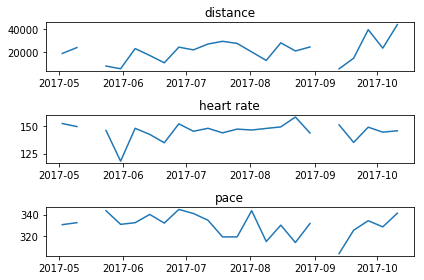

In [36]:
plt.subplot(311)
plt.plot(df_week.index, df_week['distance']['sum'])
plt.title('distance')
plt.subplot(312)
plt.plot(df_week.index, df_week['heart_rate']['mean'])
plt.title('heart rate')
plt.subplot(313)
plt.plot(df_week.index, df_week['pace']['mean'])
plt.title('pace')
plt.tight_layout()

In [37]:
len(df)

56

In [5]:
lap = activity.laps[0].doc
track_point = lap.getElementsByTagName('Trackpoint')[0]
foo = lr.TrackPoint(track_point)

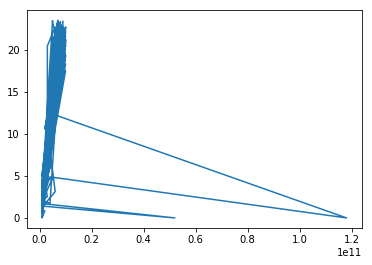

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot()

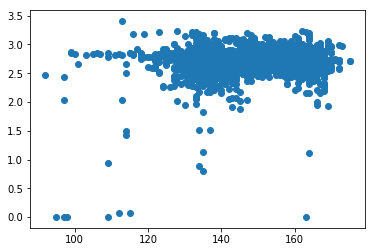

In [15]:
plt.scatter(df['heart_rate'], df['speed'])

In [10]:
df['distance'].diff()

0            NaN
1       2.680000
2      21.480000
3      22.420002
4      11.289997
5      20.150002
6      14.550003
7       2.899994
8      20.300003
9      21.190002
10     15.339996
11      3.070007
12     12.679993
13     16.910004
14     22.709991
15     20.550003
16      6.500000
17     10.130005
18     20.939987
19     18.080017
20     20.440002
21      9.259979
22     21.090027
23     20.219971
24     20.160004
25     22.080017
26     13.419983
27     20.430023
28     22.449982
29     10.740021
         ...    
276    22.919922
277    22.830078
278    15.680176
279    21.279785
280    19.290039
281    22.790039
282    20.379883
283    15.100098
284     6.859863
285    23.170410
286    21.759766
287    22.129883
288    21.500000
289     6.850098
290    22.589844
291    19.600098
292    11.200195
293     6.810059
294    21.699707
295    14.810059
296    21.020020
297    20.689941
298    21.169922
299    10.580078
300    18.379883
301    20.080078
302    16.790039
303     3.0000

In [18]:
df.time[0]

Timestamp('2017-10-14 10:21:24')

In [21]:
import numpy as np
avg_speed = np.mean(df.speed)

In [28]:
onek_pace =  pd.Timedelta(1000/avg_speed, unit='s')

In [29]:
onek_pace

Timedelta('0 days 00:06:09.635734')

In [25]:
import pandas as pd

In [27]:
pd.Timedelta(600, unit='s')

Timedelta('0 days 00:10:00')